# Problem statement:

**Social Network analysis of Human Rights violation**

# Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from numpy import linalg as la
import collections
from collections import Counter
from itertools import chain
import statsmodels as stm
import seaborn as sns
import math
import networkx as nx
import copy

# Network Construction

In [3]:
data=pd.read_csv("Problem 10.csv")

In [ ]:
data.head()

In [5]:
data.shape

(9422, 11)

In [6]:
edges=data.shape[0]

In [7]:
Source,Target=data['Actor1'].to_list(),data['Actor2'].to_list()
EdgeList=[(Source[i],Target[i]) for i in range(edges)]

In [8]:
G=nx.DiGraph()

In [9]:
data['edge']=[(data['Actor1'][i],data['Actor2'][i]) for i in range(edges)]

In [10]:
EdgeWeight=data['edge'].value_counts().to_frame().reset_index(0)

In [11]:
EdgeWeight.head()

,index,edge
0,"(IRN_IR26, IRNCOP_IR26)",25
1,"(USA_IR26, IRN_IR26)",21
2,"(IRN_IR26, USA_IR26)",20
3,"(SYRGOV_SY, SYRGOV_SY)",20
4,"(USA_USAL, SYR_SY13)",19


In [12]:
edges=EdgeWeight.shape[0]

In [13]:
WeightedEdgeList=[EdgeWeight['index'][i] + (EdgeWeight['edge'][i],) for i in range(edges)]

In [15]:
G.add_weighted_edges_from(WeightedEdgeList)

# Degree and Weighted Degree distributions

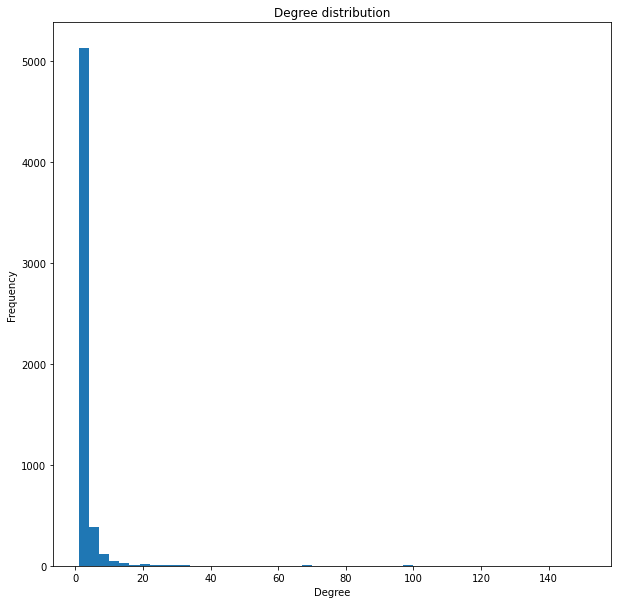

In [16]:
plt.figure(figsize=(10,10))
degrees=list(dict(G.degree()).values())
plt.hist(degrees,bins=50)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree distribution")
plt.savefig("DegreeDistribution-Lin.png")
plt.show()


In [17]:
logbins = np.geomspace(min(degrees), max(degrees), 10)
# this is similar to using logspace but in this we can directly specify the endpoints so makes our work a little easier

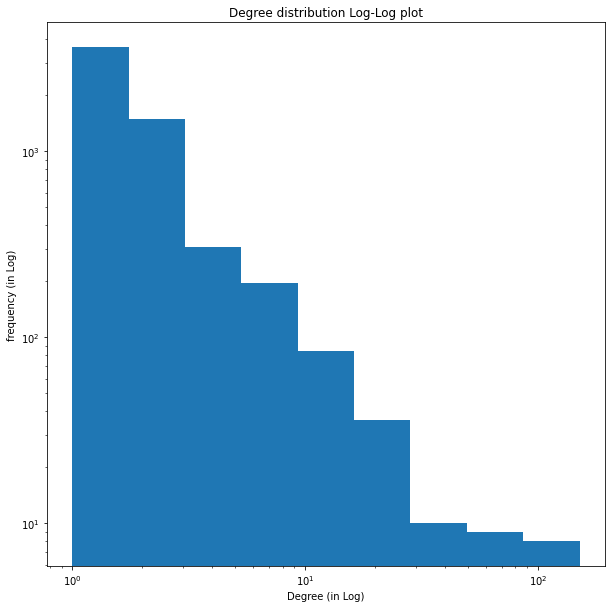

In [18]:
plt.figure(figsize=(10,10))
plt.hist(degrees,log=True,bins=logbins)
plt.xscale('log')
plt.xlabel('Degree (in Log)')
plt.ylabel('frequency (in Log)')
plt.title("Degree distribution Log-Log plot")
plt.savefig("DegreeDistribution-Log-Log.png")
plt.show()

The above is the **'Log-Log histogram plot of the distribution'**. From the plot it is clearly visible that the degree is more concentrated over certain values. In this case the most of the data is concentrated over smaller values 1-10 with very few values going above 100. To get a better picture of the distribution we will try and plot the cumulative histogram plot of the data.

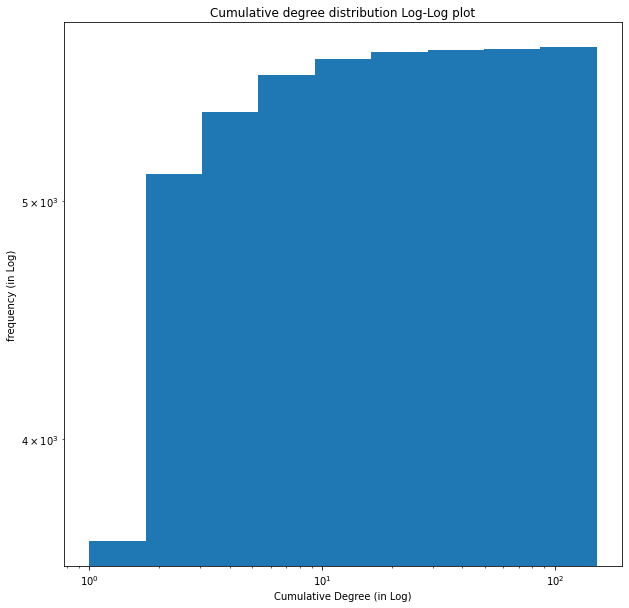

In [19]:
plt.figure(figsize=(10,10))
plt.hist(degrees,log=True,bins=logbins,cumulative=True)
plt.xscale('log')
plt.xlabel('Cumulative Degree (in Log)')
plt.ylabel('frequency (in Log)')
plt.title("Cumulative degree distribution Log-Log plot")
plt.savefig("CumulativeDegree_log-log.png")
plt.show()

As mentioned earlier most of the values are concentrated over the lower values of degress. 

Let us also consider the **'Weighted degree distribution'** which were previously not considered in literature as per the best of my knowledge

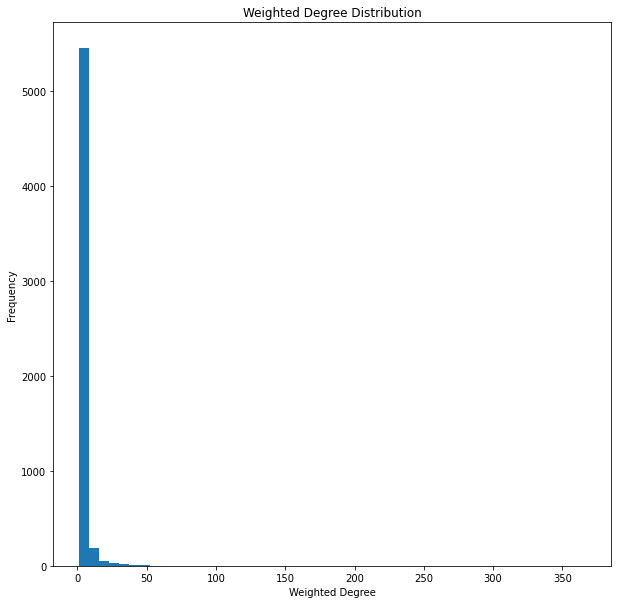

In [20]:
plt.figure(figsize=(10,10))
weightedDegree=list(dict(G.degree(weight='weight')).values())
plt.hist(weightedDegree,bins=50)
plt.xlabel("Weighted Degree")
plt.ylabel("Frequency")
plt.title("Weighted Degree Distribution")
plt.savefig("WeightedDegree_lin.png")
plt.show()

In [21]:
logbins = np.geomspace(min(weightedDegree), max(weightedDegree), 15)
# this is similar to using logspace but in this we can directly specify the endpoints so makes our work a little easier

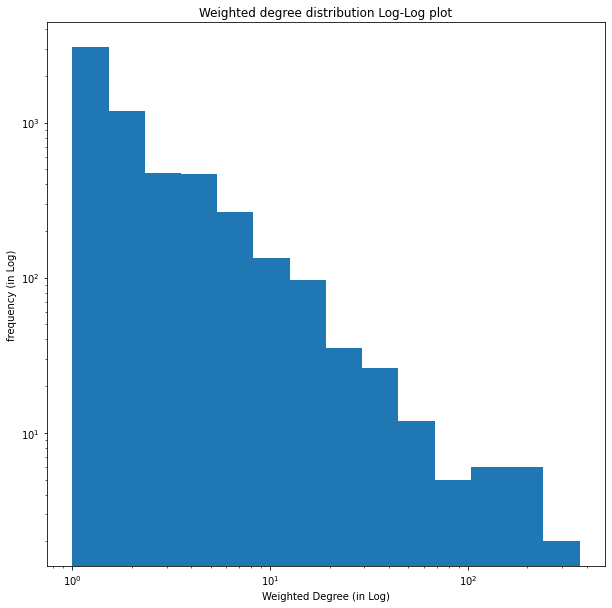

In [22]:
plt.figure(figsize=(10,10))
plt.hist(weightedDegree,log=True,bins=logbins)
plt.xscale('log')
plt.xlabel('Weighted Degree (in Log)')
plt.ylabel('frequency (in Log)')
plt.title("Weighted degree distribution Log-Log plot")
plt.savefig("WeightedDegree_Log-log.png")
plt.show()

Just by looking at the **'Log-Log histogram plot of Weighted degree'** it does not look so different from the one that we have with degree distribution. One thing to note would be that weighted degree is a little bit more finely divided as in with bins of 15 the degree plot gave some gaps but weighted degree did not. This could be a simple consequence of weighted degree having more range and more values distriburted finely in this range. 

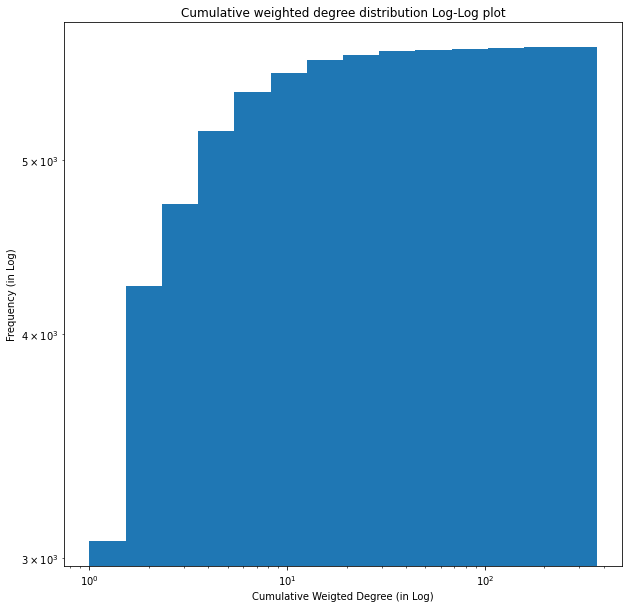

In [23]:
plt.figure(figsize=(10,10))
plt.hist(weightedDegree,log=True,bins=logbins,cumulative=True)
plt.xscale('log')
plt.xlabel('Cumulative Weigted Degree (in Log)')
plt.ylabel('Frequency (in Log)')
plt.title("Cumulative weighted degree distribution Log-Log plot")
plt.savefig("CumulativeWeighted.png")
plt.show()

Weighted distribution is also more concentrated at lower values

# Powerlaw distribution of degree

**Power law distributions** are commonly used to model phenomena in various fields where a few events or entities dominate the majority of the occurrences. As we could see from the above plots the degree distribution follows a similar kind of phenomena and hence one can estimate a power law distribution for the degree value

In [24]:
#for installing powerlaw package
#!py -m pip install powerlaw

import powerlaw
print(powerlaw.__version__)

1.5


In [25]:
data=list(dict(G.degree()).values())
fit=powerlaw.Fit(data,discrete=True) #We dont know what the value of xmin was also the degree distribution is discrete data

Calculating best minimal value for power law fit


In [26]:
fit.power_law.alpha
fit.power_law.sigma
fit.distribution_compare('power_law', 'exponential')

(89.78743582486025, 8.114982599629117e-07)

In [27]:
deg,cx=fit.cdf()

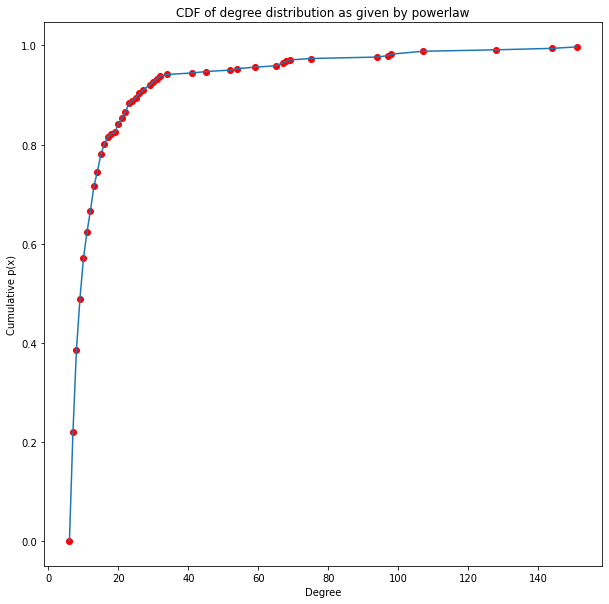

In [28]:
plt.figure(figsize=(10,10))
plt.plot(deg,cx)
plt.scatter(deg,cx,color='r')
plt.ylabel('Cumulative p(x)')
plt.xlabel('Degree')
plt.title("CDF of degree distribution as given by powerlaw")
plt.savefig("CDFDegree.png")
plt.show()

In [29]:
deg,px=fit.pdf()

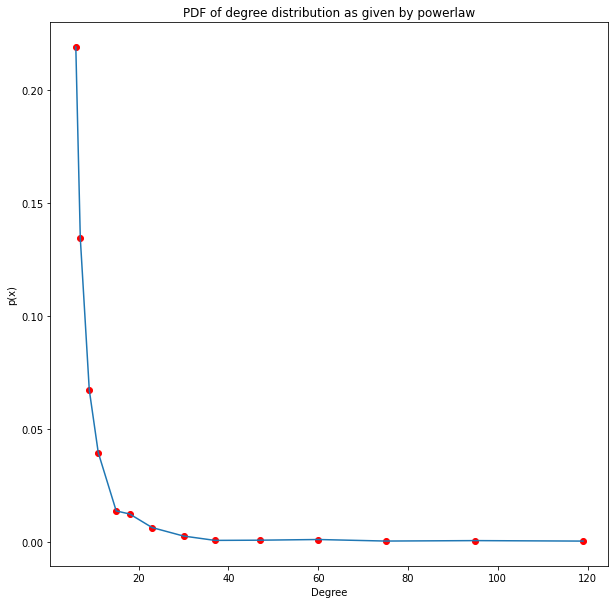

In [30]:
plt.figure(figsize=(10,10))
plt.plot(deg[:-1],px)
plt.scatter(deg[:-1],px,color='r')
plt.ylabel('p(x)')
plt.xlabel('Degree')
plt.title("PDF of degree distribution as given by powerlaw")
plt.savefig("PDFDegree.png")
plt.show()

In [31]:
alpha = fit.power_law.alpha
xmin = fit.power_law.xmin
print(f"Estimated powerlaw exponent: alpha={alpha}, estimated lower bound xmin={xmin}")

Estimated powerlaw exponent: alpha=2.5043079084479034, estimated lower bound xmin=6.0


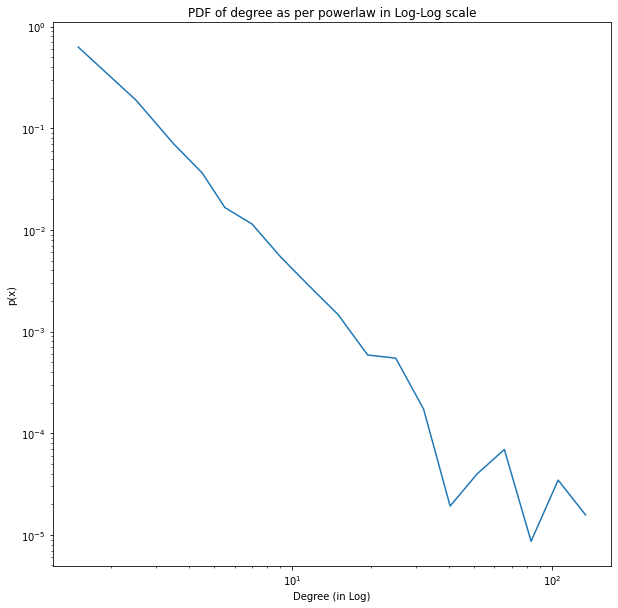

In [32]:
plt.figure(figsize=(10,10))
powerlaw.plot_pdf(data)
plt.xlabel("Degree (in Log)")
plt.ylabel("p(x)")
plt.title("PDF of degree as per powerlaw in Log-Log scale")
plt.show()

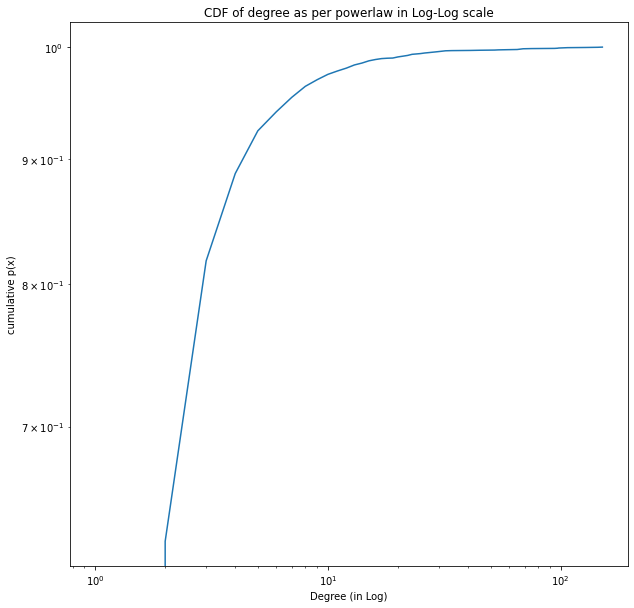

In [33]:
plt.figure(figsize=(10,10))
powerlaw.plot_cdf(data)
plt.xlabel("Degree (in Log)")
plt.ylabel("cumulative p(x)")
plt.title("CDF of degree as per powerlaw in Log-Log scale")
plt.show()

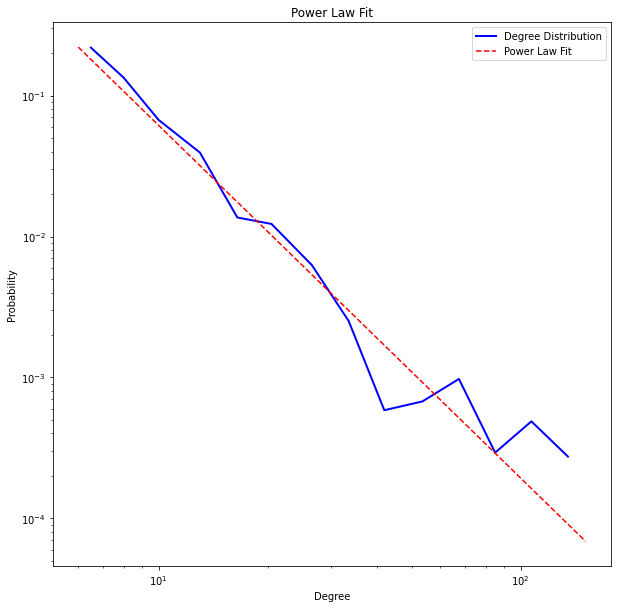

In [34]:
plt.figure(figsize=(10,10))
fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=plt.gca())
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Power Law Fit')
plt.legend(['Degree Distribution', 'Power Law Fit'])
plt.savefig("PowerLawDegree.png")
plt.show()

The estimated powerlaw distribution of the data seems to be doing a fair job of approximating the distribution.

Since we are using a weighted network, the weighted degree of the network is also somthing that one could consider to examine. 

In [35]:
data=list(dict(G.degree(weight='weight')).values())

In [36]:
fit=powerlaw.Fit(data,discrete=True) 

Calculating best minimal value for power law fit


In [37]:
fit.power_law.alpha
fit.power_law.sigma
fit.distribution_compare('power_law', 'exponential')

(383.67724813889583, 4.86282279310156e-09)

In [38]:
deg,cx=fit.cdf()

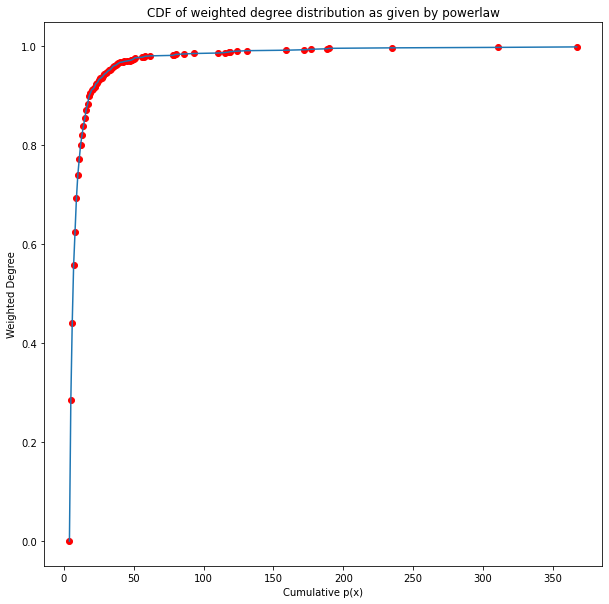

In [39]:
plt.figure(figsize=(10,10))
plt.plot(deg,cx)
plt.scatter(deg,cx,color='r')
plt.xlabel('Cumulative p(x)')
plt.ylabel('Weighted Degree')
plt.title("CDF of weighted degree distribution as given by powerlaw")
plt.savefig("CDFWeight.png")
plt.show()

In [40]:
deg,px=fit.pdf()

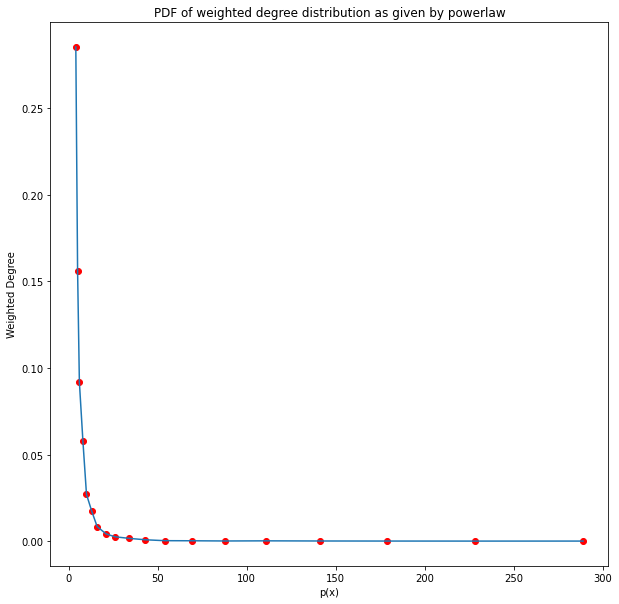

In [41]:
plt.figure(figsize=(10,10))
plt.plot(deg[:-1],px)
plt.scatter(deg[:-1],px,color='r')
plt.xlabel('p(x)')
plt.ylabel('Weighted Degree')
plt.title("PDF of weighted degree distribution as given by powerlaw")
plt.savefig("PDFWeight.png")
plt.show()

In [42]:
alpha = fit.power_law.alpha
xmin = fit.power_law.xmin
print("For weighted degree distribution")
print(f"Estimated powerlaw exponent: alpha={alpha}, estimated lower bound xmin={xmin}")

For weighted degree distribution
Estimated powerlaw exponent: alpha=2.33631326505899, estimated lower bound xmin=4.0


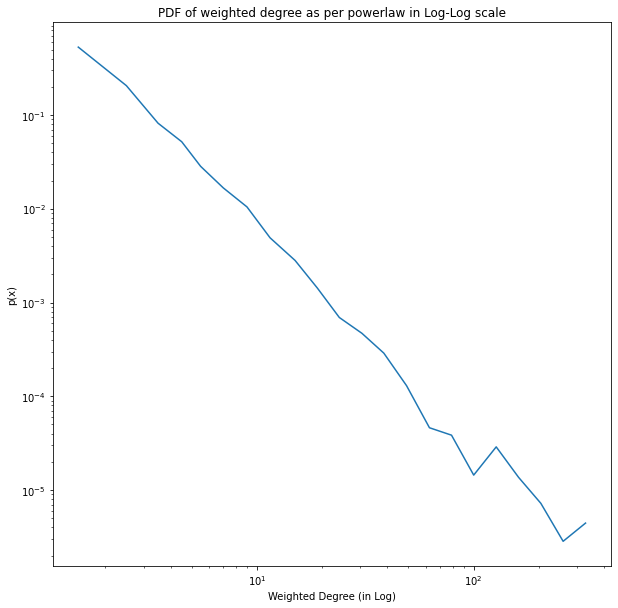

In [43]:
plt.figure(figsize=(10,10))
powerlaw.plot_pdf(data)
plt.xlabel("Weighted Degree (in Log)")
plt.ylabel("p(x)")
plt.title("PDF of weighted degree as per powerlaw in Log-Log scale")
plt.show()

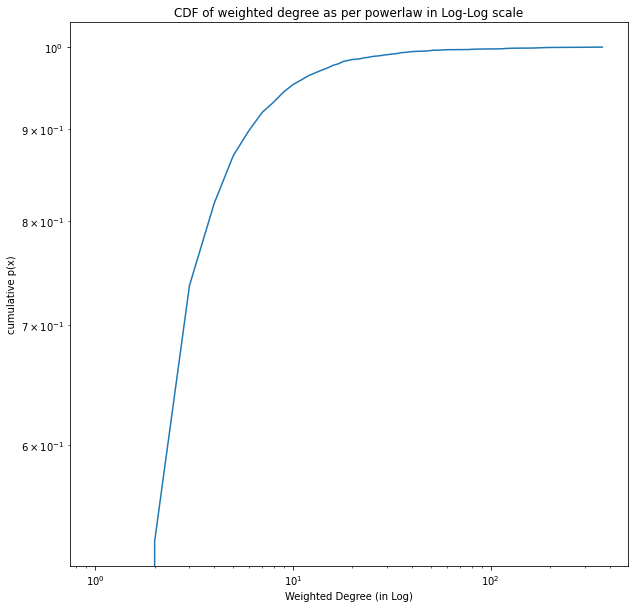

In [44]:
plt.figure(figsize=(10,10))
powerlaw.plot_cdf(data)
plt.xlabel("Weighted Degree (in Log)")
plt.ylabel("cumulative p(x)")
plt.title("CDF of weighted degree as per powerlaw in Log-Log scale")
plt.show()

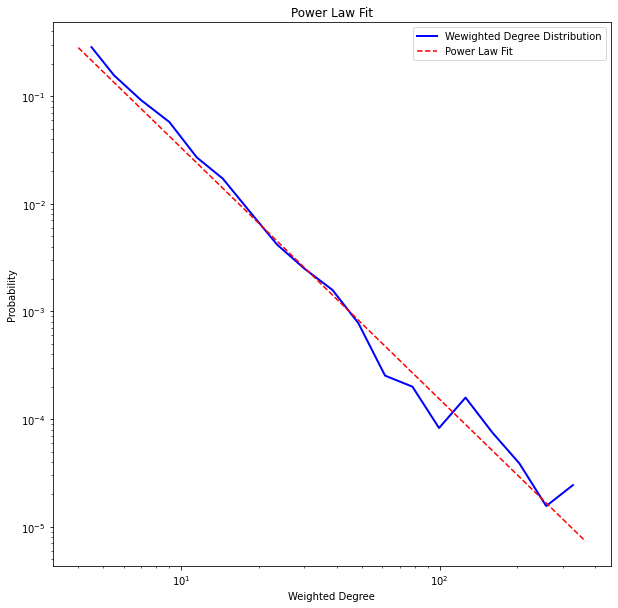

In [45]:
plt.figure(figsize=(10,10))
fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=plt.gca())
plt.xlabel('Weighted Degree')
plt.ylabel('Probability')
plt.title('Power Law Fit')
plt.legend(['Wewighted Degree Distribution', 'Power Law Fit'])
plt.savefig("PowerLawWeight.png")
plt.show()

A comparision between the powerlaw distribution of the degree and weighted degree, weighted degreee seems to follow the powerlaw distribution more closely than a degree distribution. Which means it is easier to estimate the weighted degree in contrast to estimating the degree alone

# Backbone Construction

**Testrun of disparity filter**

In [46]:
!py disparity_filter/disparity_filter.py


graph: 100 nodes 489 edges

	ptile	alpha
	0.00	0.0000
	0.04	0.0050
	0.08	0.0223
	0.12	0.0334
	0.16	0.0459
	0.20	0.0605
	0.24	0.0681
	0.28	0.0851
	0.32	0.1027
	0.36	0.1158
	0.40	0.1316
	0.44	0.1596
	0.48	0.1781
	0.52	0.2012
	0.56	0.2402
	0.60	0.2687
	0.64	0.3222
	0.68	0.3770
	0.72	0.4272
	0.76	0.5115
	0.80	0.6139
	0.84	0.6793
	0.88	0.7642
	0.92	0.8557
	0.96	0.9998

filter: percentile 0.50, min alpha 0.1781, min degree 2

graph: 89 nodes 235 edges



d:\Complex Networks\ENDSEM\disparity_filter\disparity_filter.py:270: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  for neighbor in random.sample(population, random.randint(0, k)):


In [ ]:
from disparity_filter import disparity_filter as disparity
disparity.describe_graph(G,min_degree=0,show_centrality=True)

In [50]:
alpha_measures = disparity.disparity_filter(G)
quantiles, num_quant,percentile = disparity.calc_alpha_ptile(alpha_measures)

	ptile	alpha
	0.00	0.0000
	0.04	0.0000
	0.08	0.0001
	0.12	0.0041
	0.16	0.0275
	0.20	0.0625
	0.24	0.1094
	0.28	0.1346
	0.32	0.1782
	0.36	0.2149
	0.40	0.2500
	0.44	0.2737
	0.48	0.3138
	0.52	0.3333
	0.56	0.3591
	0.60	0.4019
	0.64	0.4219
	0.68	0.4444
	0.72	0.4627
	0.76	0.5000
	0.80	0.5000
	0.84	0.5000
	0.88	0.5120
	0.92	0.6400
	0.96	0.8706


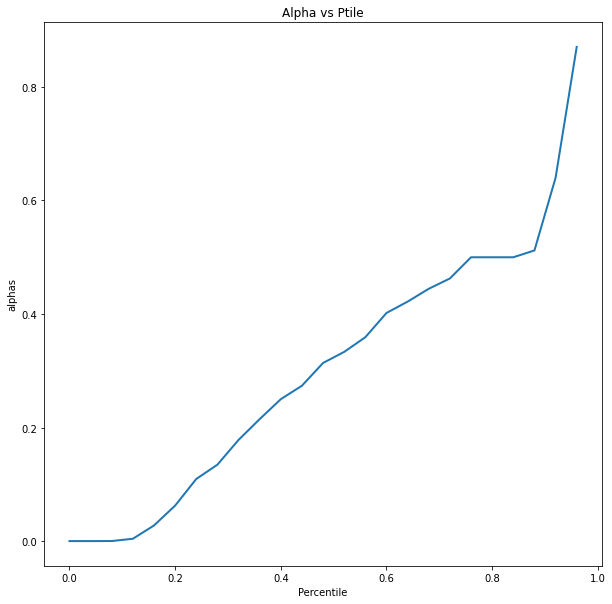

In [51]:
plt.figure(figsize=(10,10))
plt.plot(percentile,quantiles,linewidth=2)
plt.xlabel('Percentile')
plt.ylabel('alphas')
plt.title("Alpha vs Ptile")
plt.show()

We will try to find optimal threshold value. This will be done with iterating over a range of alphas and seeing ratio of edges, weight and average clustering coefficient

In [52]:
alphas=[]
for i in list(G.edges(data='alpha_ptile')):
    alphas.append(i[2])

In [53]:
WeightsSum=[]
Edges=[]
Nodes=[]
AvgClustering=[]
threshs=np.linspace(min(alphas),max(alphas),120)
for i in threshs:
    graph=copy.deepcopy(G)
    disparity.cut_graph(graph,i,1)
    WeightsSum.append(sum(weight for u, v, weight in graph.edges(data='weight')))
    Edges.append(graph.number_of_edges())
    Nodes.append(graph.number_of_nodes())
    clustering=nx.clustering(graph)
    AvgClustering.append(sum(clustering.values()) / len(clustering))
clustering=sum(nx.clustering(G).values())/len(nx.clustering(G))
weightsum=sum(weight for u, v, weight in G.edges(data='weight'))
nodes=G.number_of_nodes()
edges=G.number_of_edges()
WeightsSum=[i/weightsum for i in WeightsSum]
Edges=[i/edges for i in Edges]
Nodes=[i/nodes for i in Nodes]
AvgClustering=[i/clustering for i in AvgClustering]

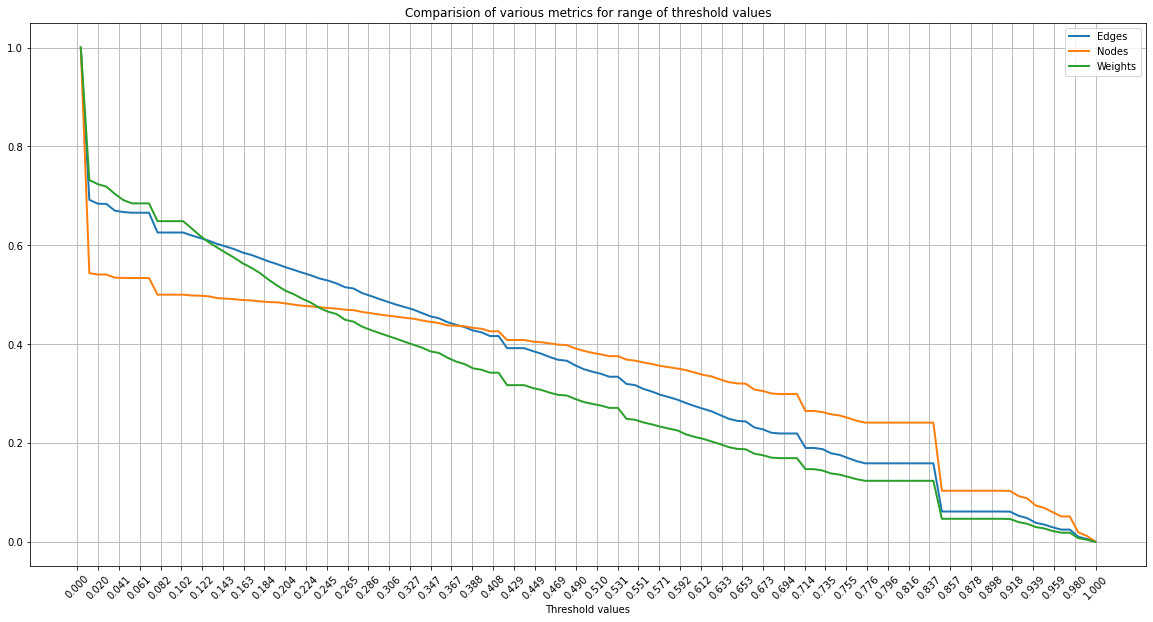

In [54]:
plt.figure(figsize=(20,10))
plt.plot(threshs,Edges,linewidth=2)
plt.plot(threshs,Nodes,linewidth=2)
plt.plot(threshs,WeightsSum,linewidth=2)
plt.legend(['Edges','Nodes','Weights'])
plt.title('Comparision of various metrics for range of threshold values')
plt.grid()
plt.xlabel("Threshold values")
plt.xticks(np.linspace(0,1,50),rotation=45)
plt.savefig("AlphaValV1.png")
plt.show()

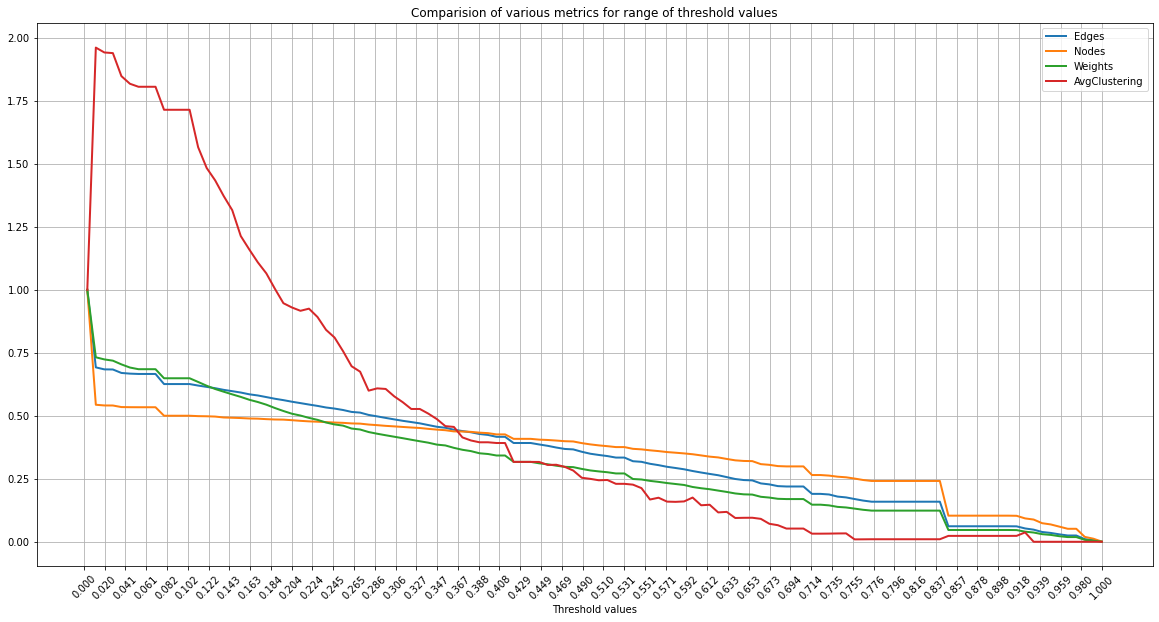

In [55]:
plt.figure(figsize=(20,10))
plt.plot(threshs,Edges,linewidth=2)
plt.plot(threshs,Nodes,linewidth=2)
plt.plot(threshs,WeightsSum,linewidth=2)
plt.plot(threshs,AvgClustering,linewidth=2)
plt.legend(['Edges','Nodes','Weights','AvgClustering'])
plt.title('Comparision of various metrics for range of threshold values')
plt.xlabel("Threshold values")
plt.grid()
plt.xticks(np.linspace(0,1,50),rotation=45)
plt.savefig("AlphaVal.png")
plt.show()

From the figure, we can see that more than $20\%$  of the weights and edges, $40\%$ of nodes disappear for a threshold of 0.01. This implies that these weights, nodes and edges were not robust and occurred only due to some random fluctuations. From 0.01 to 0.07, we observe no significant change in the values, and then from 0.07 to 0.08, we observe a small jump in value. Then from 0.08 to 0.1, the values don't change much at all. As we cross the value of 0.1, the values start decreasing faster. From this, we can conclude that a threshold value between 0.02 and 0.1 can be chosen as a threshold value without the loss of much information or nodes. To retain as much as possible and still remove the random fluctuations, we will choose a value between  0.01 and 0.07. For our case, we shall choose 0.04 midway between both values.

In [59]:
graph=copy.deepcopy(G)
disparity.cut_graph(graph,0.04,min_degree=1)
disparity.describe_graph(graph=graph)
avg_clustering=sum(nx.clustering(graph).values())/len(nx.clustering(graph))
print(f"The average clustering coefficient of the backbone of the graph is: {avg_clustering}")


graph: 3090 nodes 4483 edges

The average clustering coefficient of the backbone of the graph is: 0.05212718507607501


In [57]:
df = pd.DataFrame(G.edges(data='weight'), columns=['Source', 'Target', 'Weight'])
df.to_csv("Network.csv",index=False)

In [58]:
df = pd.DataFrame(graph.edges(data='weight'), columns=['Source', 'Target', 'Weight'])
df.to_csv("Backbone.csv",index=False)